In [3]:
#CHECKING ENVIRONMENTS
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 0.18.1
numpy: 1.11.3
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1
statsmodels: 0.6.1


### Problem Description

 * The problem is to predict the number of monthly sales of champagne for the Perrin Freres label (named for a region in France).
 * The dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data.
 * The values are a count of millions of sales and there are 105 observations.

### Test Harness
* We must develop a test harness to investigate the data and evaluate candidate models.

* This involves two steps:
 - Defining a Validation Dataset.
 - Developing a Method for Model Evaluation.

### Dataset Validation: We will withold last one year's data for the final model so that it remains unbiased. 

In [9]:
#The code below will load the dataset as a Pandas Series and split into two,...
#...one for model development (dataset.csv) and the other for validation (validation.csv).

from pandas import Series
series = Series.from_csv('/Users/nish/pais-datascience/data/champagne.csv', header=0)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 94, Validation 12


The specific contents of these files are:

dataset.csv: Observations from January 1964 to September 1971 (93 observations)
validation.csv: Observations from October 1971 to September 1972 (12 observations)
The validation dataset is about 11% of the original dataset.

Note that the saved datasets do not have a header line, therefore we do not need to cater for this when working with these files later.

### Model Evaluation
Model evaluation will only be performed on the data in dataset.csv prepared in the previous section. Model evaluation involves two elements:
- Performance Measure.
- Test Strategy.

#### Performance Measure:
-The observations are a count of champagne sales in millions of units.

-We will evaluate the performance of predictions using the root mean squared error (RMSE). This will give more weight to predictions that are grossly wrong and will have the same units as the original data.

-Any transforms to the data must be reversed before the RMSE is calculated and reported to make the performance between different methods directly comparable.

-We can calculate the RMSE using the helper function from the scikit-learn library mean_squared_error() that calculates the mean squared error between a list of expected values (the test set) and the list of predictions. We can then take the square root of this value to give us an RMSE score.

In [13]:
#Example:
from sklearn.metrics import mean_squared_error
from math import sqrt

test = 
predictions = 
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

SyntaxError: invalid syntax (<ipython-input-13-2ef38e21f44e>, line 5)

#### Test Strategy

Candidate models will be evaluated using walk-forward validation.

This is because a rolling-forecast type model is required from the problem definition. This is where one-step forecasts are needed given all available data.

The walk-forward validation will work as follows:

The first 50% of the dataset will be held back to train the model.
The remaining 50% of the dataset will be iterated and test the model.
For each step in the test dataset:
A model will be trained.
A one-step prediction made and the prediction stored for later evaluation.
The actual observation from the test dataset will be added to the training dataset for the next iteration.
The predictions made during the iteration of the test dataset will be evaluated and an RMSE score reported.
Given the small size of the data, we will allow a model to be re-trained given all available data prior to each prediction.

We can write the code for the test harness using simple NumPy and Python code.

Firstly, we can split the dataset into train and test sets directly. We’re careful to always convert a loaded dataset to float32 in case the loaded data still has some String or Integer data types.

In [14]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [18]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = test[i]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=4753.000, Expected=4753
>Predicted=3965.000, Expected=3965
>Predicted=1723.000, Expected=1723
>Predicted=5048.000, Expected=5048
>Predicted=6922.000, Expected=6922
>Predicted=9858.000, Expected=9858
>Predicted=11331.000, Expected=11331
>Predicted=4016.000, Expected=4016
>Predicted=3957.000, Expected=3957
>Predicted=4510.000, Expected=4510
>Predicted=4276.000, Expected=4276
>Predicted=4968.000, Expected=4968
>Predicted=4677.000, Expected=4677
>Predicted=3523.000, Expected=3523
>Predicted=1821.000, Expected=1821
>Predicted=5222.000, Expected=5222
>Predicted=6872.000, Expected=6872
>Predicted=10803.000, Expected=10803
>Predicted=13916.000, Expected=13916
>Predicted=2639.000, Expected=2639
>Predicted=2899.000, Expected=2899
>Predicted=3370.000, Expected=3370
>Predicted=3740.000, Expected=3740
>Predicted=2927.000, Expected=2927
>Predicted=3986.000, Expected=3986
>Predicted=4217.000, Expected=4217
>Predicted=1738.000, Expected=1738
>Predicted=5221.000, Expected=5221
>Predicted=642

In [20]:

from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=8314.000, Expected=10651
>Predicted=10651.000, Expected=3633
>Predicted=3633.000, Expected=4292
>Predicted=4292.000, Expected=4154
>Predicted=4154.000, Expected=4121
>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2899.000, Expected=3370
>Predicted=3

In [21]:
from pandas import Series
series = Series.from_csv('dataset.csv')
print(series.describe())

count       94.000000
mean      4666.010638
std       2484.748262
min       1573.000000
25%       3049.000000
50%       4031.500000
75%       5170.250000
max      13916.000000
dtype: float64


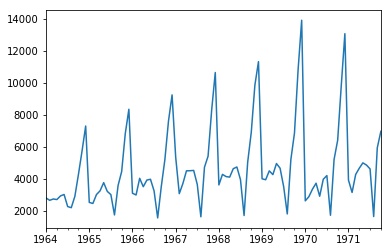

In [22]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
series.plot()
pyplot.show()

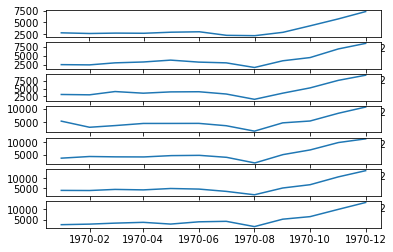

In [23]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
groups = series['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()

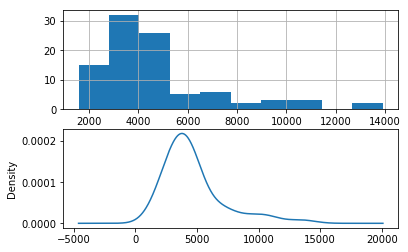

In [24]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

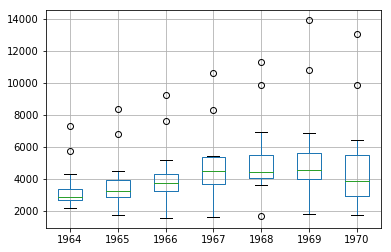

In [25]:

from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
groups = series['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

Some observations from reviewing the plots include:

The median values for each year (red line) may show an increasing trend.
The spread or middle 50% of the data (blue boxes) does appear reasonably stable.
There are outliers each year (black crosses); these may be the tops or bottoms of the seasonal cycle.
The last year, 1970, does look different from the trend in prior years

ADF Statistic: -7.180580
p-value: 0.000000
Critical Values:
	5%: -2.898
	1%: -3.514
	10%: -2.586


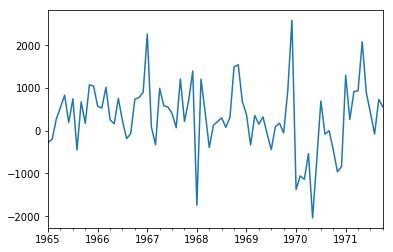

In [27]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
series = Series.from_csv('dataset.csv')
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

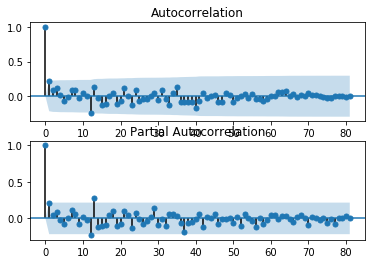

In [28]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = Series.from_csv('stationary.csv')
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [29]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=9742.801, Expected=10651
>Predicted=5986.916, Expected=3633
>Predicted=3887.251, Expected=4292
>Predicted=4038.144, Expected=4154
>Predicted=4992.346, Expected=4121
>Predicted=5156.384, Expected=4647
>Predicted=5046.688, Expected=4753
>Predicted=4143.837, Expected=3965
>Predicted=2102.967, Expected=1723
>Predicted=5228.338, Expected=5048
>Predicted=5873.359, Expected=6922
>Predicted=8571.356, Expected=9858
>Predicted=11005.997, Expected=11331
>Predicted=4087.471, Expected=4016
>Predicted=4771.836, Expected=3957
>Predicted=4676.100, Expected=4510
>Predicted=4583.392, Expected=4276
>Predicted=5117.361, Expected=4968
>Predicted=5208.160, Expected=4677
>Predicted=4436.435, Expected=3523
>Predicted=2180.878, Expected=1821
>Predicted=5471.242, Expected=5222
>Predicted=7337.590, Expected=6872
>Predicted=10268.320, Expected=10803
>Predicted=11725.373, Expected=13916
>Predicted=4519.449, Expected=2639
>Predicted=4606.024, Expected=2899
>Predicted=4938.788, Expected=3370
>Predicted=44

In [30]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = Series.from_csv('dataset.csv')
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=933.954
ARIMA(0, 0, 2) RMSE=960.443
ARIMA(0, 0, 3) RMSE=943.894
ARIMA(0, 0, 4) RMSE=957.668
ARIMA(0, 0, 5) RMSE=987.148
ARIMA(0, 0, 6) RMSE=1088.185
ARIMA(0, 1, 1) RMSE=957.960
ARIMA(0, 2, 1) RMSE=1145.504
ARIMA(1, 0, 0) RMSE=941.572
ARIMA(1, 1, 0) RMSE=1070.469
ARIMA(1, 1, 1) RMSE=956.730
ARIMA(1, 2, 0) RMSE=1555.966
ARIMA(2, 0, 0) RMSE=955.363
ARIMA(2, 1, 0) RMSE=1029.710
ARIMA(2, 1, 1) RMSE=980.478
ARIMA(2, 2, 0) RMSE=1346.554
ARIMA(2, 2, 1) RMSE=1039.187
ARIMA(3, 0, 0) RMSE=957.986
ARIMA(3, 1, 0) RMSE=1027.364
ARIMA(3, 1, 1) RMSE=979.389
ARIMA(3, 2, 0) RMSE=1249.541
ARIMA(4, 0, 0) RMSE=967.274
ARIMA(4, 1, 0) RMSE=1045.708
ARIMA(4, 1, 1) RMSE=1005.796
ARIMA(4, 2, 0) RMSE=1229.438
ARIMA(4, 2, 1) RMSE=1054.998
ARIMA(5, 0, 0) RMSE=987.288
ARIMA(5, 1, 0) RMSE=1042.012
ARIMA(5, 1, 1) RMSE=1024.009
ARIMA(5, 1, 2) RMSE=1002.324
ARIMA(5, 2, 1) RMSE=1053.421
ARIMA(6, 0, 0) RMSE=996.320
ARIMA(6, 1, 0) RMSE=1017.993
ARIMA(6, 1, 1) RMSE=1024.032
Best ARIMA(0, 0, 1) RMSE=933.

                 0
count    47.000000
mean    156.790586
std     930.652822
min   -2164.247449
25%    -289.651667
50%     191.759548
75%     584.888982
max    2367.304813


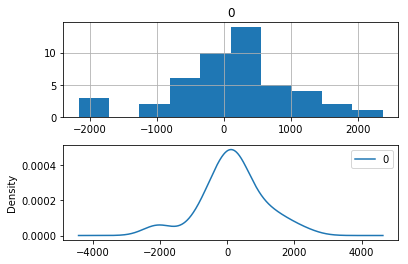

In [31]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

RMSE: 920.744
                 0
count    47.000000
mean     -9.114142
std     930.652822
min   -2330.152177
25%    -455.556395
50%      25.854820
75%     418.984254
max    2201.400085


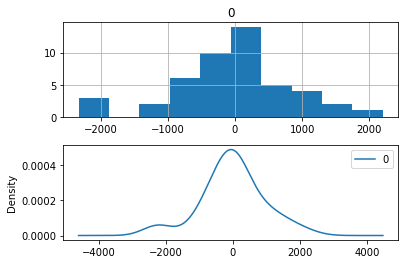

In [34]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 165.904728
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

                 0
count    47.000000
mean    156.790586
std     930.652822
min   -2164.247449
25%    -289.651667
50%     191.759548
75%     584.888982
max    2367.304813


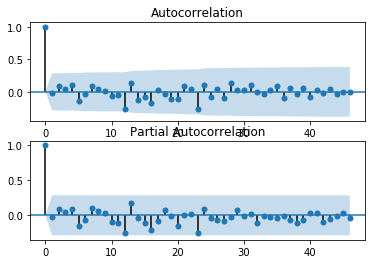

In [33]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()